# Econ C142 Problem Set 1
# Sahil Chinoy

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [97]:
# Import the data
df = pd.read_table(
    'http://people.stern.nyu.edu/wgreene/Text/tables/TableF14-2.txt',
    delim_whitespace=True,
    skiprows=2,
    header=None,
    names=[
        'firm',
        'year',
        'cost',
        'output',
        'wage',
        'labor_share',
        'capital_price',
        'capital_share',
        'fuel_price',
        'fuel_share'
    ],
    usecols=[
        'cost',
        'output',
        'wage',
        'labor_share',
        'capital_price',
        'capital_share',
        'fuel_price',
        'fuel_share'
    ]
)
# Keep only the first 145 observations
df = df.head(n=145)

## Problem 1

In [98]:
# Add a constant
df = sm.add_constant(df)
# Endogenous variable: log electrical cost / fuel price
y = np.log(df['cost'] / df['fuel_price'])
# Exogenous variables...
X = pd.DataFrame()
# ... constant
X['c'] = df['const']
# ... log output
X['Y'] = np.log(df['output'])
# ... log rent / fuel price
X['R'] = np.log(df['capital_price'] / df['fuel_price'])
# ... log wage / fuel price
X['W'] = np.log(df['wage'] / df['fuel_price'])

We assume a Cobb-Douglas production function of the form $Y = A K^\alpha L^\beta F^\gamma$, and fit the model

$$\ln C_i - \ln P_i = K + q_0 \ln Y_i + a_0 (\ln R_i - \ln P_i) + b_0 (\ln W_i - \ln P_i)$$

where $C_i$ is cost, $P_i$ is fuel price, $Y_i$ is output, $R_i$ is the price of capital (rent), and $W_i$ is the wage level.

Then $q_0 = \frac{1}{\eta}$, $a_0 = \frac{\alpha}{\eta}$, and $b_0 = \frac{\beta}{\eta}$. We also know $\gamma = \eta - \alpha -\beta$.

In [99]:
# Compute the least-squares fit
res1 = sm.OLS(y, X).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     640.1
Date:                Fri, 17 Feb 2017   Prob (F-statistic):           6.87e-82
Time:                        11:23:35   Log-Likelihood:                -67.826
No. Observations:                 145   AIC:                             143.7
Df Residuals:                     141   BIC:                             155.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c             -4.6858      0.885     -5.293      0.000        -6.436    -2.936
Y              0.7207      0.017     41.335      0.000         0.686     0.755
R             -0.0085      0.191     -0.044      0.965        -0.386     0.369
W              0.5940      0.205      2.903      0.004         0.189     0.999
==============================================================================
Omnibus:                       49.395   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.569
Skew:                           1.251   Prob(JB):                     6.76e-37
Kurtosis:                       7.616   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
eta = 1/res1.params['Y']
print('eta: %f' % eta)
alpha = res1.params['R'] * eta
print('alpha: %f' % alpha)
beta = res1.params['W'] * eta
print('beta: %f' % beta)
gamma = eta - (alpha + beta)
print('gamma: %f' % gamma)
d = gamma/eta
print('gamma/eta: %f' % d)

eta: 1.387604
alpha: -0.011754
beta: 0.824197
gamma: 0.575160
gamma/eta: 0.414499


| Coefficient | Estimate | $t$ |
| ----------- |--------:| --:|
| $q_0$ | 0.72  | 41   |
| $a_0$ | -0.01 | 0.04 |
| $b_0$ | 0.59  | 2.90 |

The coefficient on output $q_0 = 0.72$ and is statistically significant with a $t$-statistic of 41. This means that the returns-to-scale parameter $\eta = 1.39$, implying increasing returns to scale for these utilities.

The coefficient on rents, $a_0$ is negative. This implies a negative elasticity of output with respect to capital: if capital increases, then output decreases. This is implausible; however, the coefficient is small and not statistically sigificant, with a $t$-statistic of 0.04.

The coefficient on wages $b_0 = 0.59$ is statistically significant with a $t$-statistic of 2.90, and yields an estimate for the elasticity of output with respect to labor $\beta = 0.82$. This is positive, as expected.

Together, the estimates for $\eta$, $\alpha$ and $\beta$ imply an estimate for the elasticity of output with respect to fuel $\gamma = 0.58$. This is positive, as expected.

## Problem 2

In [101]:
# Calculate mean and standard deviation of input shares
shares = df[['capital_share','labor_share','fuel_share']]
stats = pd.DataFrame()
stats['mean'] = shares.mean() 
stats['std'] = shares.std()
stats.head()

,mean,std
capital_share,0.427465,0.114987
labor_share,0.106717,0.045911
fuel_share,0.467243,0.123216


These values are far different from the regression estimates. The average labor share is about 11%, far less than the coefficient from the regression, $\frac{\beta}{\eta}$, which is 59%. The average capital share is about 43%, far greater than the coefficient from the regression, $\frac{\alpha}{\eta}$, which is close to 0. The average fuel share, however, is about 47%, which is close to the value implied by the regression, $\frac{\gamma}{\eta}$, which is 41%. The average shares approximately sum to 100%, as we expect.

Nerlove makes some attempt to explain why the coefficient on capital from the regression is close to 0 — essentially, he attributes this to difficulties in measuring price and quantity of capital. That's probably what's happening here: the estimate for capital share in the regression is too low and is thus pushing the estimate for labor share too high. Still, the total returns to scale $\eta$ — the value that Nerlove is ultimately interested in — should be accurate.

## Problem 3

If we allow elasticities to vary across firms, we have

$$C_i = \eta_i \left( \frac{Y_i}{A_i} \right)^{\frac{1}{\eta_i}} R_i^{\frac{\alpha_i}{\eta_i}} W_i^{\frac{\beta_i}{\eta_i}} P_i^{\frac{\gamma_i}{\eta_i}} [\alpha_i^{\alpha_i} \beta_i^{\beta_i} \gamma_i^{\gamma_i}]^{- \frac{1}{\eta_i}}.$$

Rearranging

$$\frac{C_i \left[ \alpha_i^{\frac{\alpha_i}{\eta_i}} \beta_i^{\frac{\beta_i}{\gamma_i}} \gamma_i^{\frac{\gamma_i}{\eta_i}} \right] }{R_i^{\frac{\alpha_i}{\eta_i}} W_i^{\frac{\beta_i}{\eta_i}} P_i^{\frac{\gamma_i}{\eta_i}}} = \eta_i \left( \frac{Y_i}{A_i} \right)^{\frac{1}{\eta_i}}$$

and since $\eta_i = \eta_i^{ \frac{\alpha_i}{\eta_i} +\frac{\beta_i}{\eta_i} + \frac{\gamma_i}{\eta_i}}$

$$\frac{C_i \left[ {\frac{\alpha_i}{\eta_i}}^{\frac{\alpha_i}{\eta_i}} \right] \left[ {\frac{\beta_i}{\eta_i}}^{\frac{\beta_i}{\eta_i}} \right] \left[ {\frac{\gamma_i}{\eta_i}}^{\frac{\gamma_i}{\eta_i}} \right]   }{R_i^{\frac{\alpha_i}{\eta_i}} W_i^{\frac{\beta_i}{\eta_i}} P_i^{\frac{\gamma_i}{\eta_i}}} =  \left( \frac{Y_i}{A_i} \right)^{\frac{1}{\eta_i}}.$$

If we call the left-hand side $NC_i$ and take logs, we find

$$\ln NC_i = \frac{1}{\eta_i} \ln Y_i - \frac{1}{\eta_i} \ln A_i .$$

To make this estimable, we need to use *average* values in the coefficients and leave the variation in returns to scale and productivity to a mean-zero error term. Define $\bar{\eta^{-1}} = \mathbb{E}\left[ \frac{1}{\eta_i} \right]$

$$\ln NC_i = ( \bar{\eta^{-1}} \ln Y_i - \bar{\eta^{-1}} \ln Y_i ) + \eta_i^{-1} \ln Y_i + \left( \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] - \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] \right) - \frac{1}{\eta_i} \ln A_i .$$

Then for $d = - \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] $ and $U_i = (\eta_i^{-1} - \bar{\eta^{-1}}) \ln Y_i - \left( \frac{1}{\eta_i} \ln A_i - \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] \right)$

$$\ln NC_i = d + \bar{\eta^{-1}} \ln Y_i + U_i .$$

In [102]:
# Construct normalized cost
df['NC'] = np.log(df['cost'] \
    * df['capital_share'] ** df['capital_share'] \
    * df['labor_share'] ** df['labor_share'] \
    * df['fuel_share'] ** df['fuel_share']
    / df['capital_price'] ** df['capital_share']
    / df['wage'] ** df['labor_share']
    / df['fuel_price'] ** df['fuel_share'])

In [103]:
# Compute regression of normalized costs on log output and a constant
y2 = df['NC']
X2 = pd.DataFrame()
X2['d'] = df['const']
X2['Y'] = np.log(df['output'])
res2 = sm.OLS(y2, X2).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NC   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1414.
Date:                Fri, 17 Feb 2017   Prob (F-statistic):           5.01e-76
Time:                        11:23:35   Log-Likelihood:                -80.484
No. Observations:                 145   AIC:                             165.0
Df Residuals:                     143   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
d             -7.5428      0.126    -59.736      0.000        -7.792    -7.293
Y              0.6954      0.018     37.605      0.000         0.659     0.732
==============================================================================
Omnibus:                       25.043   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.622
Skew:                           0.879   Prob(JB):                     4.11e-09
Kurtosis:                       4.816   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression makes sense only if the necessary and sufficient conditions for the projection are satisfied; namely that the error terms $U_i$ are mean zero and orthogonal to the independent variables, in this case, output.

First, we check $\mathbb{E}[U_i] = 0$

$$\mathbb{E}[U_i] = (\mathbb{E}[\eta_i^{-1} \ln Y_i] - \mathbb{E}[ \bar{\eta^{-1}} \ln Y_i ] ) - \left( \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] - \mathbb{E} \left[ \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] \right] \right) .$$

This is zero only if $Cov(\eta_i^{-1}, \ln Y_i) = 0$. So, we must assume that the total returns to scale $\eta_i$ do not vary with the firm output $Y_i$. This is not plausible in general; it might be true in the case of utilities, whose output levels are set exogenously.

We also need $\mathbb{E}[U_i Y_i] = 0$

$$\mathbb{E}[U_i Y_i] = (\mathbb{E}[\eta_i^{-1} (\ln Y_i)^2] - \mathbb{E}[ \bar{\eta^{-1}} (\ln Y_i)^2 ] ) - \left( \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \ln Y_i \right] - \mathbb{E} \left[ \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] \ln Y_i \right] \right)$$

This is zero only if $Cov(\eta_i^{-1}, (\ln Y_i)^2) = 0$ and $Cov(\eta_i^{-1} \ln A_i, \ln Y_i) = 0$; the new assumption here is that firm output is also unrelated to the firm efficiency $A_i$. Once again, this is probably plausible only if the output levels are truly set exogenously by a regulator.

Under these assumptions, $\mathbb{E}[U_i] = \mathbb{E}[U_i Y_i] = 0$ and the regression should indeed recover $\bar{\eta^{-1}}$.

## Problem 4

| Coefficient | Estimate | t |
| ----------- |--------:| --:|
| $d$ | -7.54  | 59.7  |
| $\bar{\eta^{-1}}$ | 0.70 | 37.6 |

In [104]:
eta2 = 1/res2.params['Y']
print('eta: %f' % eta2)

eta: 1.438025


The coefficient on $Y_i$ is highly significant, and we estimate $\bar{\eta} = 1.44$, which is close to our previous estimate, $\eta = 1.39$. This is further evidence that utilities exhibit increasing returns to scale.

The constant term $d$ is also highly significant and captures the average efficiency of firms. 

In [105]:
from scipy import stats
# Calculate critical value for t distribution at 90% confidence level
alpha = 0.10
t = stats.t.isf(alpha/2., res.df_resid)
# Upper bound on fitted values at 90% confidence level
upper = res.fittedvalues + t * np.sqrt(res.mse_resid)
# Lower bound on fitted values at 90% confidence level
lower = res.fittedvalues - t * np.sqrt(res.mse_resid)

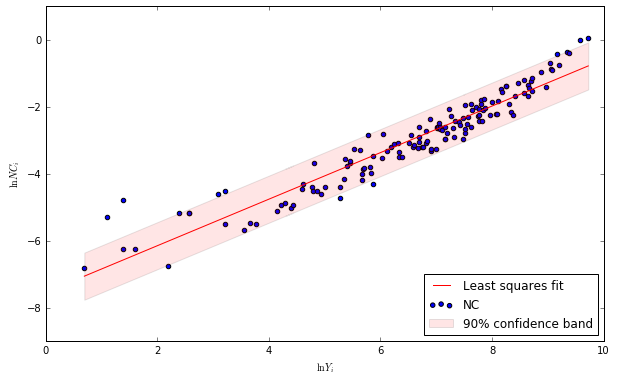

In [106]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlim([0,10])
ax.set_xlabel('$\ln Y_i$')
ax.set_ylabel('$\ln NC_i$')
# Plot scatter of normalized costs against log output
ax.scatter(np.log(df['output']), df['NC'])
# Plot least squares fit
ax.plot(
    np.log(df['output']),
    res.fittedvalues,
    'r-',
    label='Least squares fit'
)
# Plot confidence band
ax.fill_between(
    np.log(df['output']),
    lower,
    upper,
    facecolor='red',
    alpha=0.1,
    label='90% confidence band'
)
plt.legend(loc='lower right')
plt.show()

Visually, it appears as though the least squares fit captures much of the variation in $\ln NC_i$.

## Problem 5

If we assume $\eta_i^{-1} \approx \bar{\eta^{-1}}$ for all $i$, or that the returns to scale do not vary drastically across firms, then

$$U_i = - \left( \bar{\eta^{-1}} \ln A_i - \mathbb{E} \left[ \frac{1}{\eta_i} \ln A_i \right] \right) = - \left( \bar{\eta^{-1}} \ln A_i + d \right)$$

So we can use the residuals $\hat{U_i}$ to estimate $A_i$

$$A_i = e^{-\bar{\eta} (\hat{U_i} + d)}$$

In [107]:
d = res2.params['d']
# These are the LS residuals
u = res2.resid
# Calculate estimated productivity
A = np.exp(-eta2 * (d + u))

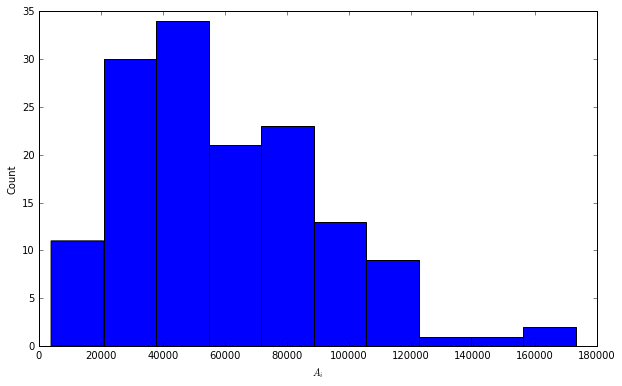

In [108]:
# Plot histogram
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(A)
ax.set_xlabel('$A_i$')
ax.set_ylabel('Count')
plt.show()

The distribution of estimated productivity $A_i$ has a long right tail; that is, it seems as though there are a few firms that are more productive than the majority. This means the cost of producing a given quantity of output is markedly less for a few super-efficient firms. Perhaps these are newer utilities with more efficient power plants. This has a number of policy implications: one could be that the price of electricity (assuming that it is set exogenously by the government) should reflect the cost of production for these efficient firms, not the average firm. This would mean electricity woud be cheaper for everyone, and would perhaps encourage the less efficient firms to "catch up" through investment in new technology.